In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('energy-consumption-by-source-and-country.csv')
df1= df[df['Entity'] == 'Italy']
df1.head()

,Entity,Code,Year,Geo Biomass Other - TWh (zero filled),Biofuels Consumption - TWh - Total (zero filled),Solar Consumption - TWh (zero filled),Wind Consumption - TWh (zero filled),Hydro Consumption - TWh (zero filled),Nuclear Consumption - TWh (zero filled),Gas Consumption - TWh (zero filled),Coal Consumption - TWh (zero filled),Oil Consumption - TWh (zero filled)
2565,Italy,ITA,1965,2.676,0.0,0.0,0.0,126.068283,9.959678,73.747002,100.320381,610.738281
2566,Italy,ITA,1966,3.351,0.0,0.0,0.0,129.279572,10.961320,80.521248,104.344360,673.434692
2567,Italy,ITA,1967,3.475,0.0,0.0,0.0,125.198921,8.943847,87.953247,114.346161,745.364868
2568,Italy,ITA,1968,3.617,0.0,0.0,0.0,126.195427,7.309438,103.293503,110.740860,821.854309
2569,Italy,ITA,1969,3.812,0.0,0.0,0.0,121.727417,4.764187,113.411751,113.671623,905.270325


In [3]:
df1['Total'] = df1.sum(axis=1)
df1['Year'] = pd.to_datetime(df1['Year'], format='%Y')
df1.head(5)

/var/folders/k2/4sq9hj556ds5m5fz707gl89r0000gn/T/ipykernel_2422/1628155206.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1['Total'] = df1.sum(axis=1)
/var/folders/k2/4sq9hj556ds5m5fz707gl89r0000gn/T/ipykernel_2422/1628155206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Total'] = df1.sum(axis=1)
/var/folders/k2/4sq9hj556ds5m5fz707gl89r0000gn/T/ipykernel_2422/1628155206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,Entity,Code,Year,Geo Biomass Other - TWh (zero filled),Biofuels Consumption - TWh - Total (zero filled),Solar Consumption - TWh (zero filled),Wind Consumption - TWh (zero filled),Hydro Consumption - TWh (zero filled),Nuclear Consumption - TWh (zero filled),Gas Consumption - TWh (zero filled),Coal Consumption - TWh (zero filled),Oil Consumption - TWh (zero filled),Total
2565,Italy,ITA,1965-01-01,2.676,0.0,0.0,0.0,126.068283,9.959678,73.747002,100.320381,610.738281,2888.509625
2566,Italy,ITA,1966-01-01,3.351,0.0,0.0,0.0,129.279572,10.961320,80.521248,104.344360,673.434692,2967.892192
2567,Italy,ITA,1967-01-01,3.475,0.0,0.0,0.0,125.198921,8.943847,87.953247,114.346161,745.364868,3052.282044
2568,Italy,ITA,1968-01-01,3.617,0.0,0.0,0.0,126.195427,7.309438,103.293503,110.740860,821.854309,3141.010537
2569,Italy,ITA,1969-01-01,3.812,0.0,0.0,0.0,121.727417,4.764187,113.411751,113.671623,905.270325,3231.657303


In [4]:
df1 = df1[['Year', 'Total']]
df1.set_index('Year',inplace=True)
df1.head(5)


,Total
Year,
1965-01-01,2888.509625
1966-01-01,2967.892192
1967-01-01,3052.282044
1968-01-01,3141.010537
1969-01-01,3231.657303


<AxesSubplot:xlabel='Year', ylabel='Total'>

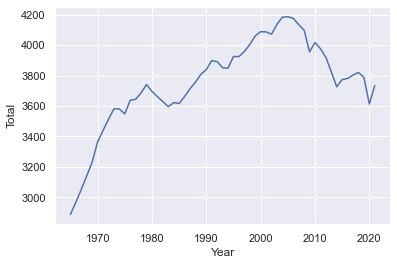

In [5]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Plot the responses for different events and region
sns.lineplot(x="Year", y="Total", data=df1)

In [6]:
# stationary test
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = df1['Total']
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))


ADF Statistic: -4.044539
p-value: 0.001194
Critical Values:
	1%: -3.553
	5%: -2.915
	10%: -2.595


Using Augmented Dickey-Fuller test, Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
Reference:
https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

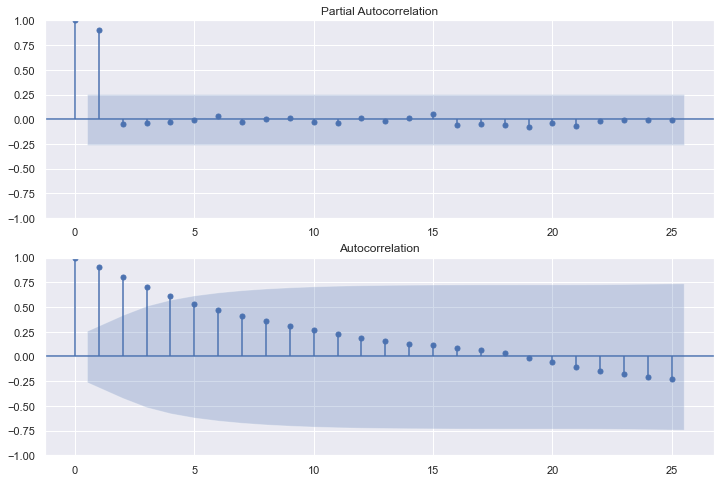

In [10]:
# arima for prediction
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8)) 
ax1=fig.add_subplot(212) 
fig = sm.graphics.tsa.plot_acf(df1['Total'],lags=25,ax=ax1) 
ax2 = fig.add_subplot(211) 
fig = sm.graphics.tsa.plot_pacf(df1['Total'], lags=25, ax=ax2, method='ywm')


From partial autocorrelation: set p = 1

From autocorrelation: set q = 3, 4, 5

In [11]:
from statsmodels.tsa.arima.model import ARIMA
model3 = ARIMA(df1['Total'], order = (1, 0, 3)).fit()
model4 = ARIMA(df1['Total'], order = (1, 0, 4)).fit()
model5 = ARIMA(df1['Total'], order = (1, 0, 5)).fit()
print("arma_mod3:", model3.aic)
print("arma_mod4:", model4.aic)
print("arma_mod5:", model5.aic)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency inform

arma_mod3: 640.6382763064462
arma_mod4: 642.6378574328563
arma_mod5: 644.3103474750396


In [12]:
# set p = 1, d = 0, q = 3
model3 = ARIMA(df1['Total'], order = (1, 0, 3)).fit()
model3.summary()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Total   No. Observations:                   57
Model:                 ARIMA(1, 0, 3)   Log Likelihood                -314.319
Date:                Mon, 05 Dec 2022   AIC                            640.638
Time:                        14:18:00   BIC                            652.897
Sample:                    01-01-1965   HQIC                           645.402
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3751.8484    694.278      5.404      0.000    2391.089    5112.608
ar.L1          0.9797      0.043     22.562      0.000       0.895       1.065
ma.L1          0.2313      0.146      1.581      0.114      -0.055       0.518
ma.L2          0.2874      0.216      1.330      0.184      -0.136       0.711
ma.L3          0.2133      0.176      1.213      0.225      -0.131       0.558
sigma2      3330.3200    654.660      5.087      0.000    2047.210    4613.430
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):                 2.77
Prob(Q):                              0.50   Prob(JB):                         0.25
Heteroskedasticity (H):               2.37   Skew:                            -0.18
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

p value for L1 and L2 is not significant. set q = 1. 

In [13]:
model1 = ARIMA(df1['Total'], order = (1, 0, 1))
fitted = model1.fit()
fitted.summary()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Total   No. Observations:                   57
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -316.129
Date:                Mon, 05 Dec 2022   AIC                            640.258
Time:                        14:18:03   BIC                            648.430
Sample:                    01-01-1965   HQIC                           643.434
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3448.0356    339.761     10.148      0.000    2782.117    4113.954
ar.L1          0.9859      0.026     37.275      0.000       0.934       1.038
ma.L1          0.2564      0.128      2.001      0.045       0.005       0.508
sigma2      3578.2435    715.086      5.004      0.000    2176.701    4979.786
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 3.22
Prob(Q):                              0.72   Prob(JB):                         0.20
Heteroskedasticity (H):               1.74   Skew:                            -0.42
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

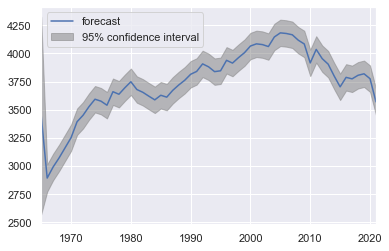

In [14]:
# Actual vs Fitted
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(fitted, dynamic=False)
plt.show()

In [15]:
predict = fitted.predict(start = 0, end = 130, dynamic = False)
df_preidct = pd.DataFrame(predict)
df_complete = pd.concat([df1, df_preidct], axis = 1)
df_complete

,Total,predicted_mean
1965-01-01,2888.509625,3448.035635
1966-01-01,2967.892192,2893.860685
1967-01-01,3052.282044,2992.514872
1968-01-01,3141.010537,3073.143803
1969-01-01,3231.657303,3162.749874
...,...,...
2091-01-01,NaN,3569.239262
2092-01-01,NaN,3567.524466
2093-01-01,NaN,3565.833930
2094-01-01,NaN,3564.167312


<AxesSubplot:>

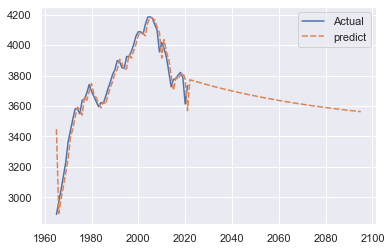

In [16]:
df_complete = df_complete.rename(columns = {'Total':'Actual', 'predicted_mean':'predict'})
sns.lineplot(data = df_complete)

In [23]:
predict = df_complete['predict'].tail(75)
predict.to_csv('demand_prediction')

Source: https://ourworldindata.org/grapher/energy-consumption-by-source-and-country?stackMode=absolute&country=~ITA